In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
sns.set_style("darkgrid")

In [2]:
tools = pd.read_parquet('../data/tools.parquet')
fpmms = pd.read_parquet('../data/fpmms.parquet')
summary_traders = pd.read_parquet('../data/summary_profitability.parquet')
all_trades = pd.read_parquet('../data/all_trades_profitability.parquet')

In [3]:
all_trades.current_answer.value_counts()

current_answer
 1    12373
 0    10879
-1      801
Name: count, dtype: int64

In [4]:
all_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053 entries, 0 to 24052
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trader_address          24053 non-null  object             
 1   trade_id                24053 non-null  object             
 2   creation_timestamp      24053 non-null  datetime64[ns, UTC]
 3   title                   24053 non-null  object             
 4   market_status           24053 non-null  object             
 5   collateral_amount       24053 non-null  float64            
 6   outcome_index           24053 non-null  object             
 7   trade_fee_amount        24053 non-null  float64            
 8   outcomes_tokens_traded  24053 non-null  float64            
 9   current_answer          24053 non-null  int64              
 10  is_invalid              24053 non-null  bool               
 11  winning_trade           24053 non-null  b

In [10]:
all_trades.trader_address.values[0]

'0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736'

In [5]:
tools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103058 entries, 0 to 103057
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   request_id               103058 non-null  object 
 1   request_block            103058 non-null  int64  
 2   prompt_request           103058 non-null  object 
 3   tool                     103058 non-null  object 
 4   nonce                    103058 non-null  object 
 5   trader_address           103058 non-null  object 
 6   deliver_block            103058 non-null  int64  
 7   error                    103055 non-null  float64
 8   error_message            12052 non-null   object 
 9   prompt_response          99322 non-null   object 
 10  mech_address             103058 non-null  object 
 11  p_yes                    91003 non-null   float64
 12  p_no                     91003 non-null   float64
 13  confidence               91003 non-null   float64
 14  info

In [11]:
tools["trader_address"] = tools["trader_address"].apply(lambda x: x.lower())

In [43]:
# join trades with the tool information
selected_tools_info = tools[["tool", "title", "request_id", "trader_address", "win_probability"]]

In [23]:
len(selected_tools_info)

103058

In [44]:
tools_usage_per_trader=selected_tools_info.groupby(["trader_address", "title", "tool"]).agg({"request_id": 'count'}).reset_index()

In [45]:
tools_usage_per_trader.rename(columns={"request_id":"nr_requests"},inplace=True)
tools_usage_per_trader.head()

trader_address  \
0  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
1  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
2  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
3  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
4  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   

                                               title  \
0  Will Amazon's Project PI AI successfully detec...   
1  Will Apple TV Plus app be available on Google ...   
2  Will Apple TV Plus app be available on Google ...   
3  Will Apple TV Plus app be available on Google ...   
4  Will Apple TV Plus app be available on Google ...   

                            tool  nr_requests  
0              prediction-online            2  
1              prediction-online            4  
2         prediction-online-lite            2  
3          prediction-online-sme            1  
4  prediction-request-rag-claude            7

In [46]:
traders = list(tools_usage_per_trader.trader_address.unique())
len(traders)

181

In [47]:
selected_trades = all_trades[["trader_address", "title", "roi"]]

In [48]:
tools_usage_extended = tools_usage_per_trader.merge(selected_trades, how="left", on=["trader_address", "title"])

In [49]:
tools_usage_extended.head()

trader_address  \
0  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
1  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
2  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
3  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   
4  0x01e5ca24fe7e653fe32cc4589ab1ecde73f39850   

                                               title  \
0  Will Amazon's Project PI AI successfully detec...   
1  Will Apple TV Plus app be available on Google ...   
2  Will Apple TV Plus app be available on Google ...   
3  Will Apple TV Plus app be available on Google ...   
4  Will Apple TV Plus app be available on Google ...   

                            tool  nr_requests  roi  
0              prediction-online            2  NaN  
1              prediction-online            4  NaN  
2         prediction-online-lite            2  NaN  
3          prediction-online-sme            1  NaN  
4  prediction-request-rag-claude            7  NaN

In [50]:
tools_usage_extended.tail()

trader_address  \
55682  0xfebd61c529191982772c1a12f20c7f694eb4385d   
55683  0xfebd61c529191982772c1a12f20c7f694eb4385d   
55684  0xfebd61c529191982772c1a12f20c7f694eb4385d   
55685  0xfebd61c529191982772c1a12f20c7f694eb4385d   
55686  0xfebd61c529191982772c1a12f20c7f694eb4385d   

                                                   title  \
55682  Will there be another tornado in Nebraska and ...   
55683  Will there be any Chinese military drills affe...   
55684  Will there be any Chinese military drills affe...   
55685  Will there be more pro-Palestinian protests on...   
55686  Will there be more pro-Palestinian protests on...   

                                tool  nr_requests  roi  
55682   prediction-request-reasoning            4  NaN  
55683  prediction-request-rag-claude            1  NaN  
55684   prediction-request-reasoning            1  NaN  
55685          prediction-online-sme            2  NaN  
55686  prediction-request-rag-claude            1  NaN

In [51]:
tools_usage_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55687 entries, 0 to 55686
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trader_address  55687 non-null  object 
 1   title           55687 non-null  object 
 2   tool            55687 non-null  object 
 3   nr_requests     55687 non-null  int64  
 4   roi             35141 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [53]:
tools_usage_extended=tools_usage_extended.dropna()
tools_usage_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35141 entries, 5 to 55567
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trader_address  35141 non-null  object 
 1   title           35141 non-null  object 
 2   tool            35141 non-null  object 
 3   nr_requests     35141 non-null  int64  
 4   roi             35141 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


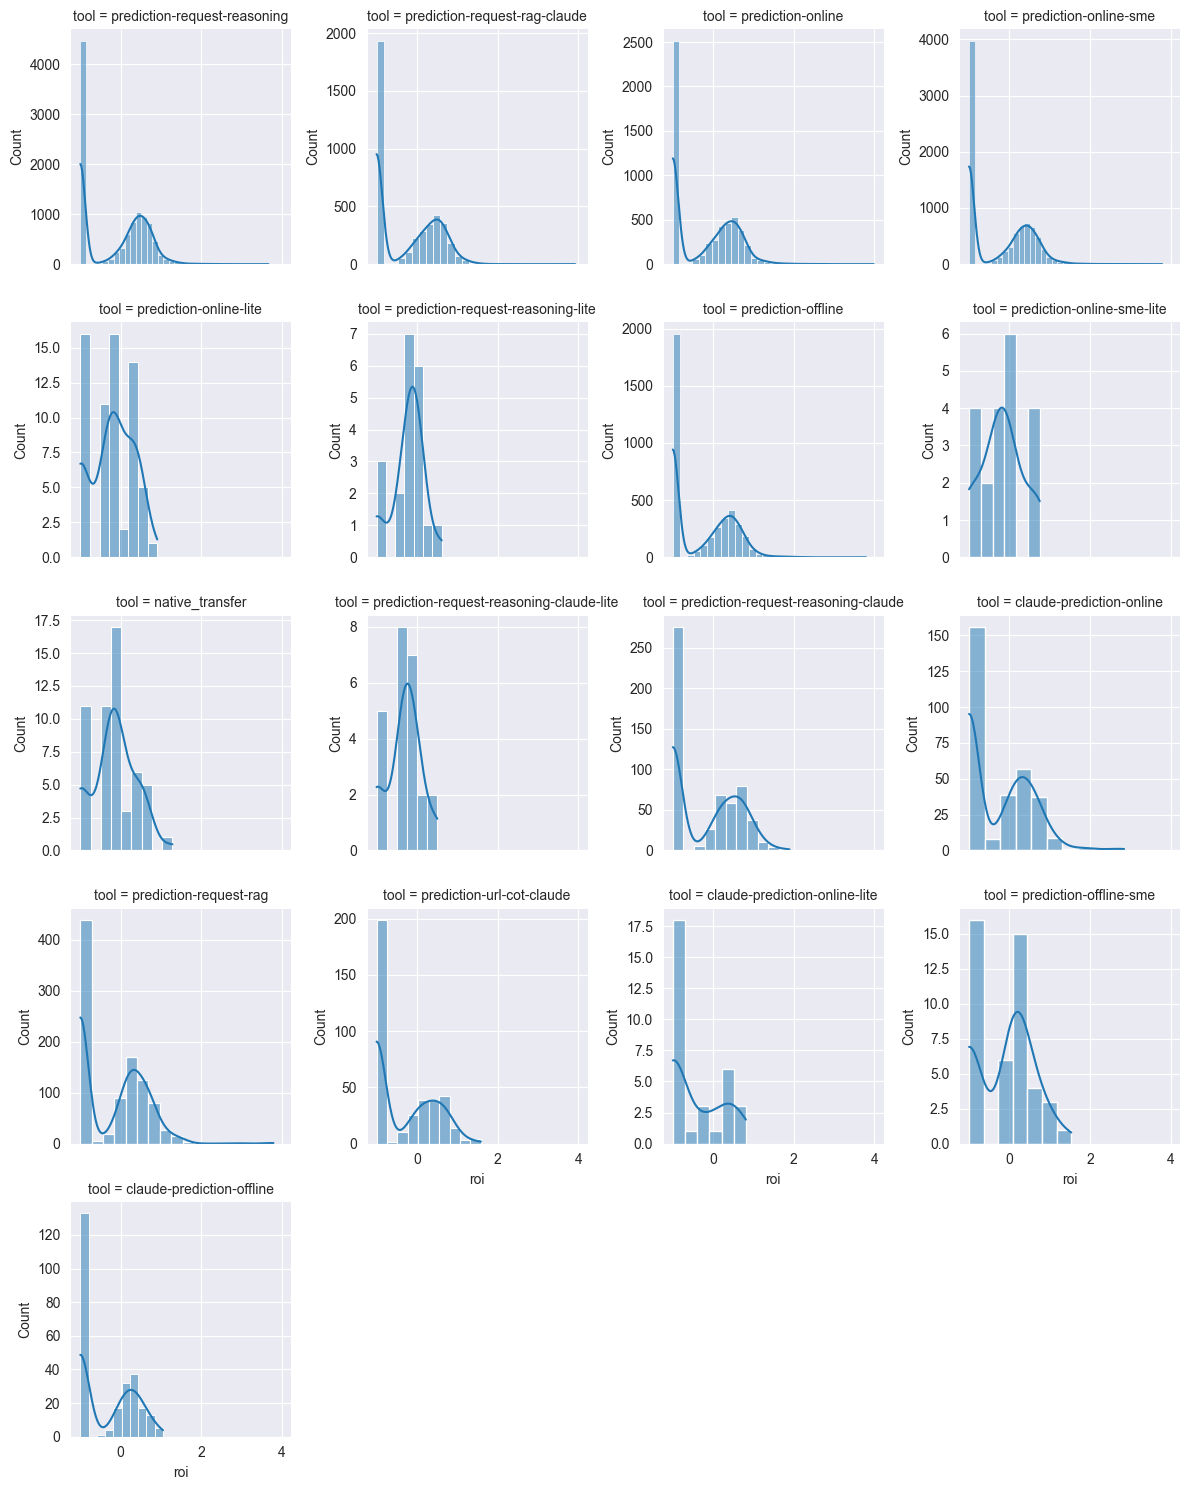

In [60]:
g = sns.FacetGrid(tools_usage_extended, col="tool", col_wrap=4, sharey=False)
g.map(sns.histplot, "roi", kde=True)

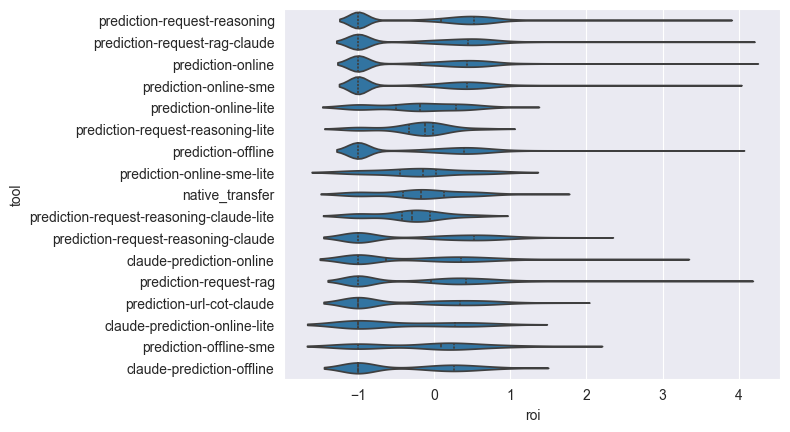

In [56]:
ax=sns.violinplot(data=tools_usage_extended, y="tool", x="roi", inner="quart")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

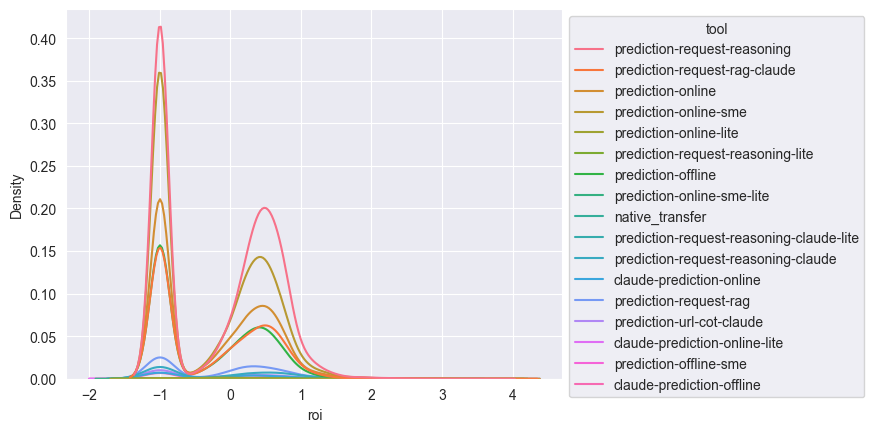

In [58]:
ax=sns.kdeplot(tools_usage_extended, x="roi", hue="tool")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))